In [1]:
import random
import numpy as np
import pandas as pd
from tabulate import tabulate
from statistics import mean

from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Experimentando Diferentes conjuntos de dados

## 1.1) Pré-processamento

### 1.1.1) Retornando array flatten

In [2]:
def config_ravel(y_train, y_test):
    y_train_ravel = y_train.values.ravel()
    y_test_ravel = y_test.values.ravel()  

    return y_train_ravel, y_test_ravel

### 1.1.2) Padronizar as características (normalização)

In [3]:
def config_standart_scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

## 1.2) Carregar os dados de treinamento e teste

In [4]:
X_train_array = []
y_train_array = []
X_test_array = []
y_test_array = []  

def get_data_from_conjunto(conjunto: int):      

    X_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_train.csv')
    y_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_train.csv')
    X_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_test.csv')
    y_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_test.csv')

    num_classes = len(np.unique(y_train))
    input = X_train.shape[1]
    
    y_train, y_test = config_ravel(y_train, y_test)
    # y_train, y_test = config_standart_scaler(X_train, X_test)

    X_train_array.append(X_train)
    y_train_array.append(y_train)
    X_test_array.append(X_test)
    y_test_array.append(y_test)

    return num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array

## 1.3) Montando rede

In [5]:
def train_knns(X_train, y_train):
    knn_model = KNeighborsClassifier(n_neighbors=3) 

    cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
    f1_per_fold = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='f1_weighted')
    recall_per_fold = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='recall_weighted')
    precision_per_fold = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='precision_weighted')

    knn_model.fit(X_train, y_train)

    # Calculando métricas para cada fold
    accuracy_mean = mean(cv_scores)
    f1_mean = mean(f1_per_fold)
    recall_mean = mean(recall_per_fold)
    precision_mean = mean(precision_per_fold)

    return accuracy_mean, f1_mean, recall_mean, precision_mean, knn_model

## 1.4) Carregando dados e treinando (Cross validation)

In [6]:
conjuntos = 10
resultados_acuracia = []
resultados_precisao = []
resultados_revocacao = []
resultados_f1 = []
best_models = []

for i in range(conjuntos):
    print(f'\nConjunto {i + 1}')
    num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array = get_data_from_conjunto(i)

    media_accuracy, media_f1, media_recall, media_precision, model = train_knns(X_train_array[i], y_train_array[i])

    print(f'Acurácia: {media_accuracy}')
    print(f'F1: {media_f1}')
    print(f'Revocação: {media_recall}')
    print(f'Precisão: {media_precision}')

    resultados_acuracia.append(media_accuracy)
    resultados_precisao.append(media_precision)
    resultados_revocacao.append(media_recall)
    resultados_f1.append(media_f1)
    best_models.append(model)


Conjunto 1
Acurácia: 0.9571428571428572
F1: 0.956598250980607
Revocação: 0.9571428571428572
Precisão: 0.958327959932709

Conjunto 2
Acurácia: 0.9557142857142857
F1: 0.955562050304749
Revocação: 0.9557142857142857
Precisão: 0.9563090924261142

Conjunto 3
Acurácia: 0.9557142857142857
F1: 0.9554409605432433
Revocação: 0.9557142857142857
Precisão: 0.9561949867543917

Conjunto 4
Acurácia: 0.9485714285714286
F1: 0.9480493629761242
Revocação: 0.9485714285714286
Precisão: 0.9488438123491382

Conjunto 5
Acurácia: 0.9485714285714285
F1: 0.9484194868341301
Revocação: 0.9485714285714285
Precisão: 0.9489220836390386

Conjunto 6
Acurácia: 0.9471428571428572
F1: 0.9465233975706296
Revocação: 0.9471428571428572
Precisão: 0.9489573168722373

Conjunto 7
Acurácia: 0.9528571428571428
F1: 0.9525345356136231
Revocação: 0.9528571428571428
Precisão: 0.9532171391554901

Conjunto 8
Acurácia: 0.9471428571428572
F1: 0.94703938020626
Revocação: 0.9471428571428572
Precisão: 0.9485357202894007

Conjunto 9
Acurácia:

In [7]:
# Criar um DataFrame com os resultados
resultados_acuracia_percent = [f"{acuracia * 100:.2f}%" for acuracia in resultados_acuracia]
resultados_precisao_percent = [f"{precisao * 100:.2f}%" for precisao in resultados_precisao]
resultados_revocacao_percent = [f"{revocacao * 100:.2f}%" for revocacao in resultados_revocacao]
resultados_f1_percent = [f"{f1 * 100:.2f}%" for f1 in resultados_f1]

# Criar um DataFrame com os resultados
data = {
    'Conjunto': [f'Conjunto {i+1}' for i in range(conjuntos)],
    'Acurácia': resultados_acuracia_percent,
    'Precisão': resultados_precisao_percent,
    'Revocação': resultados_revocacao_percent,
    'F1': resultados_f1_percent
}

df_resultados = pd.DataFrame(data)

print("# Resultados Médios do treinamento em 10 Conjuntos de Dados\n")
print(df_resultados.to_markdown(index=False))

# Resultados Médios do treinamento em 10 Conjuntos de Dados

| Conjunto    | Acurácia   | Precisão   | Revocação   | F1     |
|:------------|:-----------|:-----------|:------------|:-------|
| Conjunto 1  | 95.71%     | 95.83%     | 95.71%      | 95.66% |
| Conjunto 2  | 95.57%     | 95.63%     | 95.57%      | 95.56% |
| Conjunto 3  | 95.57%     | 95.62%     | 95.57%      | 95.54% |
| Conjunto 4  | 94.86%     | 94.88%     | 94.86%      | 94.80% |
| Conjunto 5  | 94.86%     | 94.89%     | 94.86%      | 94.84% |
| Conjunto 6  | 94.71%     | 94.90%     | 94.71%      | 94.65% |
| Conjunto 7  | 95.29%     | 95.32%     | 95.29%      | 95.25% |
| Conjunto 8  | 94.71%     | 94.85%     | 94.71%      | 94.70% |
| Conjunto 9  | 95.57%     | 95.58%     | 95.57%      | 95.54% |
| Conjunto 10 | 95.29%     | 95.34%     | 95.29%      | 95.27% |


## 1.5) Analisando resultados gerais

In [8]:
# Calculate the overall mean
overall_mean_acuracia = sum(resultados_acuracia) / len(resultados_acuracia)
overall_mean_precisao = sum(resultados_precisao) / len(resultados_precisao)
overall_mean_revocacao = sum(resultados_revocacao) / len(resultados_revocacao)
overall_mean_f1 = sum(resultados_f1) / len(resultados_f1)

# Create a DataFrame
data = {
    'Acurácia': [overall_mean_acuracia],
    'Precisão': [overall_mean_precisao],
    'Revocação': [overall_mean_revocacao],
    'F1-Score': [overall_mean_f1]
}

df = pd.DataFrame(data)

# Display the table
print(df)

   Acurácia  Precisão  Revocação  F1-Score
0  0.952143  0.952852   0.952143  0.951832


## 1.6) Matriz de confusao e resultados da predição

----------------------------------------------------------------
Eficácia do conjunto 1


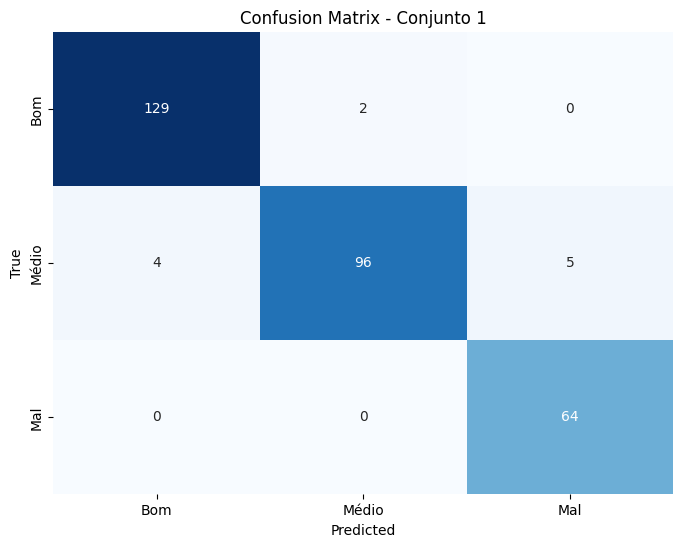

Acurácia no conjunto de teste: 96.33%

Precisão no conjunto de teste: 96.43%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.98      0.98       131
       Medio       0.98      0.91      0.95       105
        Ruim       0.93      1.00      0.96        64

    accuracy                           0.96       300
   macro avg       0.96      0.97      0.96       300
weighted avg       0.96      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 2


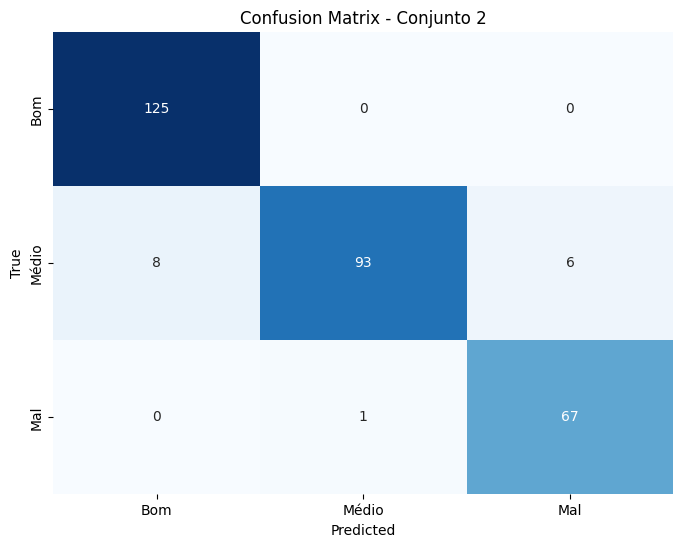

Acurácia no conjunto de teste: 95.00%

Precisão no conjunto de teste: 95.25%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.94      1.00      0.97       125
       Medio       0.99      0.87      0.93       107
        Ruim       0.92      0.99      0.95        68

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 3


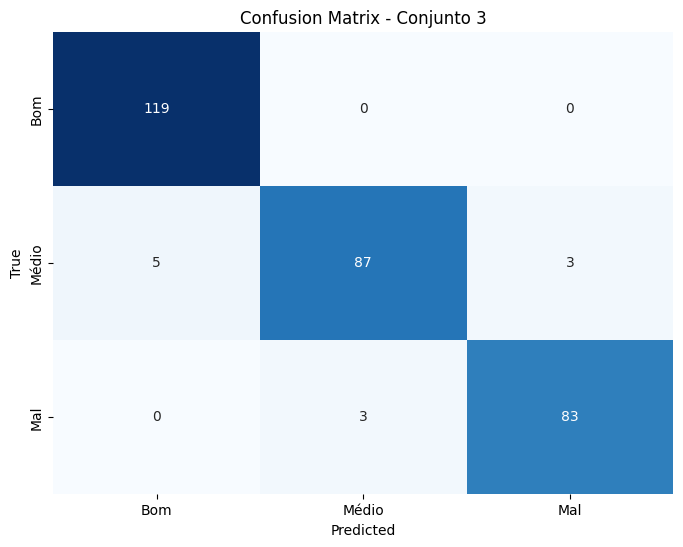

Acurácia no conjunto de teste: 96.33%

Precisão no conjunto de teste: 96.34%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      1.00      0.98       119
       Medio       0.97      0.92      0.94        95
        Ruim       0.97      0.97      0.97        86

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 4


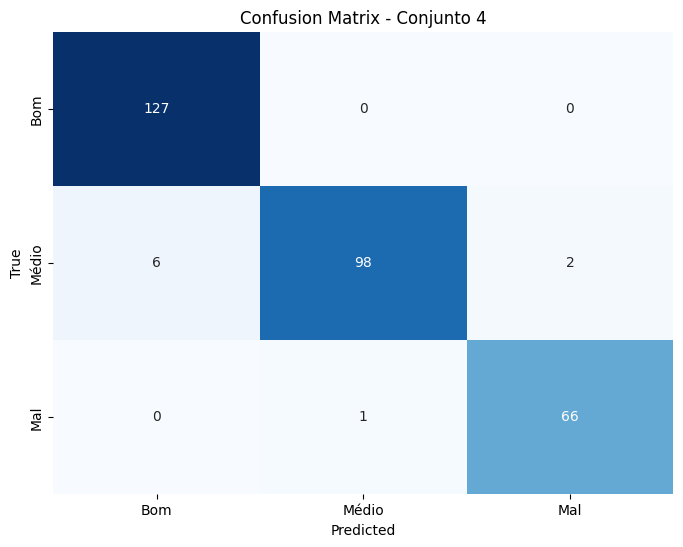

Acurácia no conjunto de teste: 97.00%

Precisão no conjunto de teste: 97.08%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.95      1.00      0.98       127
       Medio       0.99      0.92      0.96       106
        Ruim       0.97      0.99      0.98        67

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


----------------------------------------------------------------

Eficácia do conjunto 5


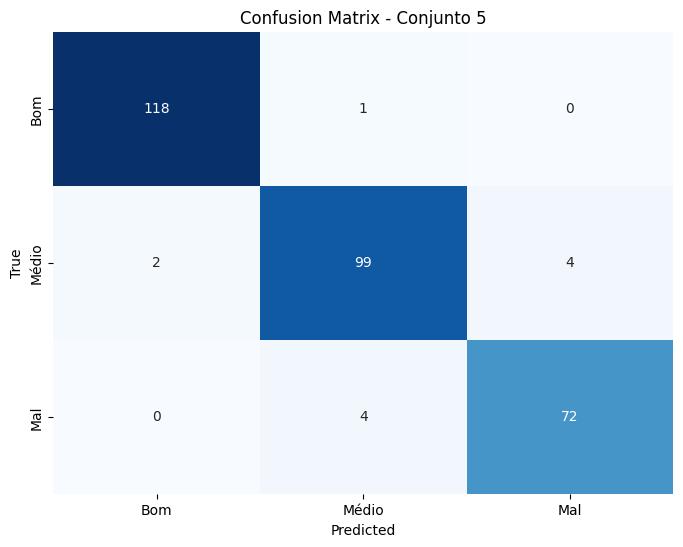

Acurácia no conjunto de teste: 96.33%

Precisão no conjunto de teste: 96.32%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.98      0.99      0.99       119
       Medio       0.95      0.94      0.95       105
        Ruim       0.95      0.95      0.95        76

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 6


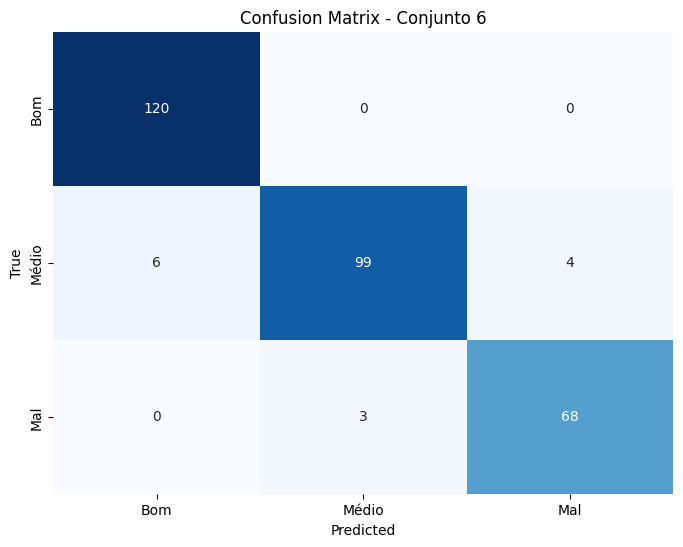

Acurácia no conjunto de teste: 95.67%

Precisão no conjunto de teste: 95.71%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.95      1.00      0.98       120
       Medio       0.97      0.91      0.94       109
        Ruim       0.94      0.96      0.95        71

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 7


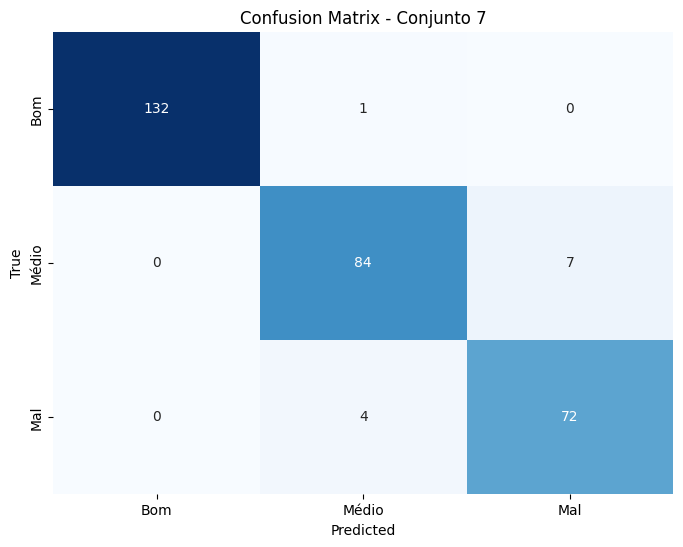

Acurácia no conjunto de teste: 96.00%

Precisão no conjunto de teste: 96.05%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       1.00      0.99      1.00       133
       Medio       0.94      0.92      0.93        91
        Ruim       0.91      0.95      0.93        76

    accuracy                           0.96       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 8


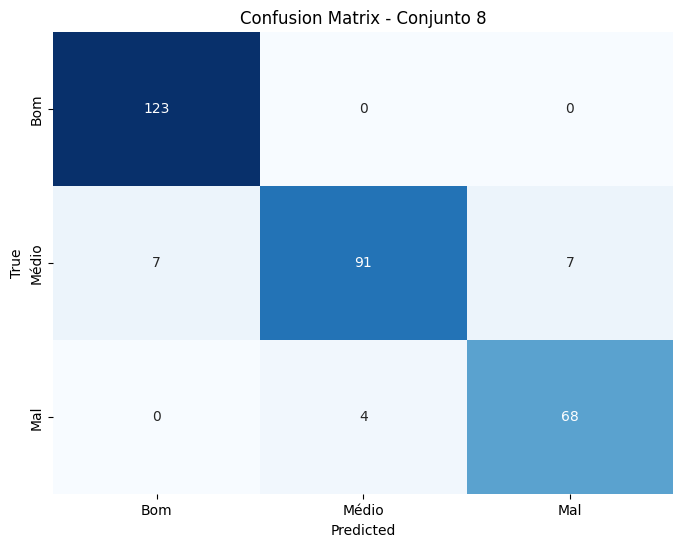

Acurácia no conjunto de teste: 94.00%

Precisão no conjunto de teste: 94.08%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.95      1.00      0.97       123
       Medio       0.96      0.87      0.91       105
        Ruim       0.91      0.94      0.93        72

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300


----------------------------------------------------------------

Eficácia do conjunto 9


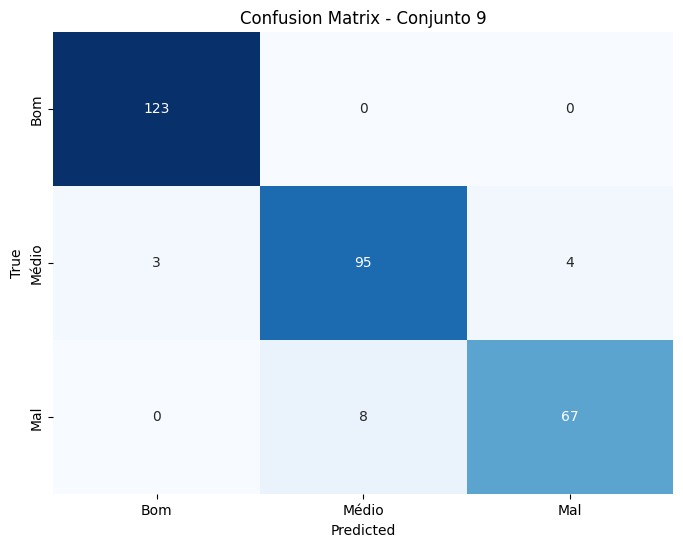

Acurácia no conjunto de teste: 95.00%

Precisão no conjunto de teste: 94.97%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.98      1.00      0.99       123
       Medio       0.92      0.93      0.93       102
        Ruim       0.94      0.89      0.92        75

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 10


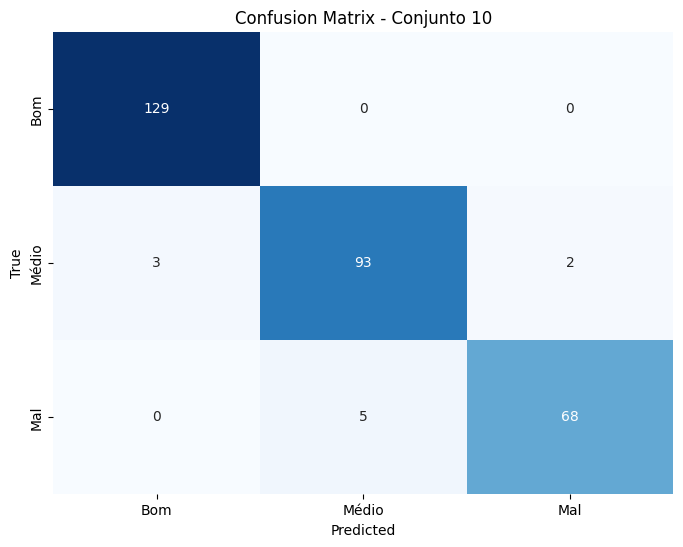

Acurácia no conjunto de teste: 96.67%

Precisão no conjunto de teste: 96.66%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.98      1.00      0.99       129
       Medio       0.95      0.95      0.95        98
        Ruim       0.97      0.93      0.95        73

    accuracy                           0.97       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.97      0.97       300


----------------------------------------------------------------



In [9]:
print("----------------------------------------------------------------")
# List to store average accuracies for each conjunto
average_accuracies = []
average_precisions = []
for i in range(conjuntos):
    print(f'Eficácia do conjunto {i + 1}')
    X_test = X_test_array[i]
    y_test = y_test_array[i]

    # Load the trained model for the current dataset
    naiveBayes = best_models[i]

    # Make predictions on the test set
    y_pred = naiveBayes.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Conjunto {i + 1}')
    plt.show()

      # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    average_accuracies.append(accuracy)
    
    print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%\n')

    # Precisao do modelo
    precision = precision_score(y_test, y_pred, average='weighted')

    # Append precisions to the list
    average_precisions.append(precision)

    print(f'Precisão no conjunto de teste: {precision * 100:.2f}%\n')


    # Print classification report
    classification_rep = classification_report(y_test, y_pred)
    print(f'Relatório de Classificação:\n{classification_rep}')
    

    print('\n----------------------------------------------------------------\n')

In [10]:
# Find the index of the conjunto with the highest average accuracy
accuracy_mean = mean(average_accuracies)
precision_mean = mean(average_precisions)

best_conjunto_index = np.argmax(average_accuracies)

# Acuracia media de todos os conjuntos
print(f'Acurácia média de todos os conjuntos: {accuracy_mean * 100:.2f}%')

# Precisao media de todos os conjuntos
print(f'Precisão média de todos os conjuntos: {precision_mean * 100:.2f}%')

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {best_conjunto_index + 1} obteve os melhores resultados.")

Acurácia média de todos os conjuntos: 95.83%
Precisão média de todos os conjuntos: 95.89%

O conjunto 4 obteve os melhores resultados.


# 2) Experimentando as melhores configurações de parametros

## OBS: Pegando um conjunto aleatorio entre os 10 


In [11]:
conjunto_aleatorio = random.randint(0, 9)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {conjunto_aleatorio + 1} será utilizado para o teste de parâmetros")


O conjunto 3 será utilizado para o teste de parâmetros


## 2.1) Carregar os dados de treinamento e teste

In [12]:
# MUDAR ISSO -> ESCOLHER UM NUMERO ENTRE 1 A 10 E PEGAR AQUELE CONJUNTO

X_train = X_train_array[conjunto_aleatorio]
y_train = y_train_array[conjunto_aleatorio]
X_test = X_test_array[conjunto_aleatorio]
y_test = y_test_array[conjunto_aleatorio]


## 2.2) Treinando modelo 

In [13]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Teste diferentes valores para o número de vizinhos
    'weights': ['uniform', 'distance'],  # Teste pesos uniformes e ponderados pela distância
    'p': [1, 2],  # Teste distância de Manhattan (p=1) e distância Euclidiana (p=2)
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

## 2.3) Analisando todas combinações

In [14]:
# Seus dados do GridSearchCV
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]  # Adicione o índice de linha (i+1)
    table_data.append(row)

# Crie a tabela usando a função tabulate
table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

╒══════════════╤════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                    │ Train Score   │ Validation Score   │
╞══════════════╪════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}   │ 0.98          │ 0.952857           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}  │ 1             │ 0.952857           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 3            │ {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}   │ 0.9825        │ 0.955714           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 4            │ {'n_neighbors': 3, '

## 2.4) Analisando Cada combinação para var_smoothing

In [15]:

# # Extrair os resultados do GridSearchCV
# results = grid_search.cv_results_

# # Valores únicos de var_smoothing
# var_smoothing_values = param_grid['var_smoothing']

# # Precisões obtidas no treinamento (média de validação cruzada)
# train_scores = results['mean_train_score']

# # Precisões obtidas no teste (média de validação cruzada)
# test_scores = results['mean_test_score']

# # Número de combinações de hiperparâmetros
# n_combinations = len(param_grid['priors']) * len(var_smoothing_values)

# # Largura das barras
# bar_width = 0.35

# # Loop para criar gráficos separados para cada var_smoothing
# for i, var_smoothing in enumerate(var_smoothing_values):
#     plt.figure(figsize=(12, 6))
    
#     # Índices para o eixo x
#     x_indices = np.arange(len(param_grid['priors']))
    
#     # Precisões correspondentes de treinamento e teste para este var_smoothing
#     train_scores_var_smoothing = train_scores[i::n_combinations]
#     test_scores_var_smoothing = test_scores[i::n_combinations]
    
#     # Rótulos para as combinações de hiperparâmetros
#     labels = [f'priors={priors}' for priors in param_grid['priors']]
    
#     plt.bar(x_indices, train_scores_var_smoothing, width=bar_width, label='Treinamento', color='b', align='center')
#     plt.bar(x_indices + bar_width, test_scores_var_smoothing, width=bar_width, label='Teste', color='g', align='center')
    
#     plt.xlabel('Combinação de Hiperparâmetros')
#     plt.ylabel('Precisão')
#     plt.title(f'Precisão de Treinamento e Teste para var_smoothing={var_smoothing}')
#     plt.xticks(x_indices + bar_width / 2, labels, rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()

## 2.5) Tabela comparativa para todas combinações

In [16]:
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]
    table_data.append(row)

table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

# # Crie um DataFrame a partir dos dados da tabela
# df = pd.DataFrame(table_data, columns=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'])

# # Salve o DataFrame em um arquivo CSV
# df.to_csv('resultados.csv', index=False)  # Isso salvará os dados em um arquivo CSV chamado 'resultados.csv'

╒══════════════╤════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                    │ Train Score   │ Validation Score   │
╞══════════════╪════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}   │ 0.98          │ 0.952857           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}  │ 1             │ 0.952857           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 3            │ {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}   │ 0.9825        │ 0.955714           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 4            │ {'n_neighbors': 3, '

## 2.6) Predição para o melhor modelo

In [17]:
best_naive_bayes = grid_search.best_estimator_

y_pred = best_naive_bayes.predict(X_test)

## 2.7) Matriz Confusão

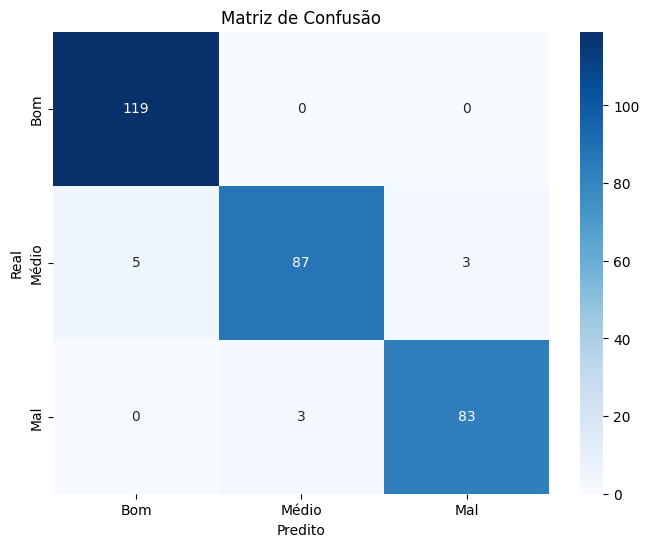

In [18]:
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 2.8) Métricas de eficácia

In [19]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Precisão: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      1.00      0.98       119
       Medio       0.97      0.92      0.94        95
        Ruim       0.97      0.97      0.97        86

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

----------------------------------------------------------------

Acurácia: 0.9633333333333334
Precisão: 0.9634498207885304
Recall: 0.9633333333333334
Medida F: 0.9630093056018982
